## No noise

First, we will just experiment with no noise to make sure we construct an accurate simulation of the original results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

m = 5 #Number of columns 
r = 2 #Dimension of U*

U = np.random.rand(m,r) #Random (true) subspace
#U = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) #Example true space

print("True space \n", U)

True space 
 [[0.04488451 0.11479788]
 [0.81112633 0.85832003]
 [0.75787701 0.5791911 ]
 [0.93068682 0.78137609]
 [0.59737938 0.46923249]]


##### Note:

In our experiments, we will take $W$ to be either of the form:

$$
\begin{matrix}
1 & 1 & ... & 1 \\
1 & 1 & ... & 1 \\
1 & 1 & ... & 1 \\
... & ... & ... & ... \\
1 & 1 & ... & 1 \\
1 & 0 & ... & 0 \\
0 & 1 & ... & 0 \\
... & ... & ... & ... \\
0 & 0 & ... & 1 \\
\end{matrix}
$$

with a block of r 1's in the first r rows and an identity matrix at the bottom, or

$$
\begin{matrix}
1 & 0 & ... & 0 \\
1 & 1 & ... & 0 \\
1 & 1 & ... & 0 \\
... & ... & ... & ... \\
0 & 0 & ... & 1 \\
\end{matrix}
$$

with each column having r+1 $1$s starting from the main diagonal. 


We could choose any $W$ satisfying our assumptions. This was taken because of ease of generalization in the code.

In [2]:
#Define the binary matrix W

W = np.zeros((m,m-r))

#Uncomment for the first type of W matrix

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if i < r:
            W[i][j] = 1
        else:
            if i-r == j:
                W[i][j] = 1
"""
#Uncomment for the second type of W matrix


for i in range(W.shape[1]):
    temp = 0
    while temp!=r+1:
        W[temp+i][i] = 1
        temp+=1
"""

        
W_T = np.transpose(W)

print("Binary matrix \n", W)

Binary matrix 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [3]:
#Computing the projections of S onto canonical coordinates

U_proj = np.array(np.hstack(([[U[j,:] for j in range(np.shape(U)[0]) if W_T[i,j] == 1] for i in range(W_T.shape[0])])))

print("Matrix of projections of S onto lower dimensions \n", U_proj)

Matrix of projections of S onto lower dimensions 
 [[0.04488451 0.11479788 0.04488451 0.11479788 0.04488451 0.11479788]
 [0.81112633 0.85832003 0.81112633 0.85832003 0.81112633 0.85832003]
 [0.75787701 0.5791911  0.93068682 0.78137609 0.59737938 0.46923249]]


In [4]:
#Computing the nullspaces of the projections

from scipy.linalg import null_space

A_temp = np.array(np.hstack(([[null_space(U_proj.T[i:i+r, :])[j,:] for j in range(U_proj.T.shape[1])] for i in range(0, U_proj.T.shape[0], r)])))

print("Matrix of basis vectors of the nullspace of projections \n", A_temp)


Matrix of basis vectors of the nullspace of projections 
 [[-0.91088494 -0.87755126 -0.87705868]
 [ 0.3075165   0.38162895  0.31539404]
 [-0.27517672 -0.29028114 -0.36234607]]


In [5]:
#Creating the matrix A whose null space will be the true subspace 
#And computing its singular values

A = np.array(W, dtype = float)

for j in range(A.shape[1]):
    c = 0
    for i in range(A.shape[0]):
        if A[i,j] == 1:
            A[i,j] = A_temp[c, j]
            c+=1
print("Matrix whose kernel will be our guess \n", A)

Sig = np.linalg.svd(A)[1]

print("Singular values \n", Sig)

Matrix whose kernel will be our guess 
 [[-0.91088494 -0.87755126 -0.87705868]
 [ 0.3075165   0.38162895  0.31539404]
 [-0.27517672  0.          0.        ]
 [ 0.         -0.29028114  0.        ]
 [ 0.          0.         -0.36234607]]
Singular values 
 [1.6738567  0.33951646 0.28797974]


In [6]:
#Finding kernel space of A

U_test = null_space(A.T)

print("Basis of guessed space \n", U_test)

Basis of guessed space 
 [[ 0.22191782 -0.3143981 ]
 [ 0.83385196 -0.38441362]
 [ 0.19726098  0.61112352]
 [ 0.42537307  0.4450757 ]
 [ 0.18865112  0.42639848]]


In [7]:
# Testing for whether the span of ker(A) is the same as column space of U - i.e. the true space
# We test this by looking at the projection matrices 
# Error estimated with the ||P_true - P_test||_F, the frobenius norm of the difference in Projection matrices

P_test = np.dot(U_test,np.dot(np.linalg.inv(np.dot(U_test.T,U_test)), U_test.T))

P_true = np.dot(U,np.dot(np.linalg.inv(np.dot(U.T,U)), U.T))

error = (1/math.sqrt(2))*np.linalg.norm(P_true - P_test, 'fro') 

print ("True projection", P_true)
print ("Guessed projection", P_test)

print ("Error", error)

True projection [[ 0.14809368  0.30590552 -0.14836035 -0.04553309 -0.09219383]
 [ 0.30590552  0.84308292 -0.07043775  0.18360501 -0.00660628]
 [-0.14836035 -0.07043775  0.41238386  0.35590574  0.29779565]
 [-0.04553309  0.18360501  0.35590574  0.37903463  0.27002671]
 [-0.09219383 -0.00660628  0.29779565  0.27002671  0.21740491]]
Guessed projection [[ 0.14809368  0.30590552 -0.14836035 -0.04553309 -0.09219383]
 [ 0.30590552  0.84308292 -0.07043775  0.18360501 -0.00660628]
 [-0.14836035 -0.07043775  0.41238386  0.35590574  0.29779565]
 [-0.04553309  0.18360501  0.35590574  0.37903463  0.27002671]
 [-0.09219383 -0.00660628  0.29779565  0.27002671  0.21740491]]
Error 7.294746843856998e-15


## With noise 

Now we will perform the same experiment, but we will add noise into the mix and see how the noise translates through every step.

In [8]:
m = 7 #Number of columns 
r = 3 #Dimension of U*


U = np.random.rand(m,r) #Random (true) subspace

#Uncomment the following out for an example true space
#m = 5
#r = 2
#U = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) 

print("True space \n", U)

True space 
 [[0.07731885 0.03294845 0.98446238]
 [0.41862581 0.93708427 0.1279112 ]
 [0.40331899 0.11862029 0.29385146]
 [0.76763529 0.46998844 0.97591206]
 [0.3271376  0.574063   0.64888746]
 [0.48287083 0.8738295  0.94147049]
 [0.58906333 0.71611635 0.44440426]]


In [9]:
#Define the binary matrix W

W = np.zeros((m,m-r))

#Uncomment for the first type of W matrix
"""
for i in range(W.shape[1]):
    temp = 0
    while temp!=r+1:
        W[temp+i][i] = 1
        temp+=1
"""

#Uncomment for the second type of W matrix

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if i < r:
            W[i][j] = 1
        else:
            if i-r == j:
                W[i][j] = 1

        
W_T = np.transpose(W)

print("Binary matrix \n", W)

Binary matrix 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [10]:
# Computing the projections of S onto canonical coordinates

# No noise Version

U_proj = np.array(np.hstack(([[U[j,:] for j in range(U.shape[0]) if W_T[i,j] == 1] for i in range(W_T.shape[0])])))

# Creating the noisy versions

mu = 0 # mean
sigma = 1e-3 # standard deviation

#Adding noise from a Gaussian distribution

Z_proj = np.random.normal(mu, sigma, (U_proj.shape[0], U_proj.shape[1]))
V_proj = U_proj + Z_proj


print("Projections of U onto lower dimensions w/o noise \n", U_proj)
print("Projections of U onto lower dimensions w/ noise \n", V_proj)

Projections of U onto lower dimensions w/o noise 
 [[0.07731885 0.03294845 0.98446238 0.07731885 0.03294845 0.98446238
  0.07731885 0.03294845 0.98446238 0.07731885 0.03294845 0.98446238]
 [0.41862581 0.93708427 0.1279112  0.41862581 0.93708427 0.1279112
  0.41862581 0.93708427 0.1279112  0.41862581 0.93708427 0.1279112 ]
 [0.40331899 0.11862029 0.29385146 0.40331899 0.11862029 0.29385146
  0.40331899 0.11862029 0.29385146 0.40331899 0.11862029 0.29385146]
 [0.76763529 0.46998844 0.97591206 0.3271376  0.574063   0.64888746
  0.48287083 0.8738295  0.94147049 0.58906333 0.71611635 0.44440426]]
Projections of U onto lower dimensions w/ noise 
 [[0.07806624 0.03484058 0.9840881  0.07692762 0.03118544 0.98587636
  0.07739593 0.03303768 0.98303194 0.07809561 0.03179295 0.98354086]
 [0.41925755 0.93692536 0.12792441 0.4196714  0.93677915 0.12841517
  0.41880475 0.93598556 0.12585975 0.41820085 0.94064664 0.12791863]
 [0.40206459 0.11971771 0.2943034  0.40263644 0.11951597 0.29389036
  0.40426

In [11]:
# Finding the spectral norm of the largest noise matrix to get epsilon

epsilon = 0

for j in range(0, Z_proj.shape[1], r):
    lam = np.amax(np.linalg.svd(Z_proj[:, j:j+r])[1])
    epsilon = np.amax([epsilon, lam])
print("epsilon", epsilon)

epsilon 0.004282379233067055


In [12]:
# Computing the nullspaces of the projections

# No noise version

A_temp = np.array(np.hstack(([[null_space(U_proj.T[i:i+r, :])[j,:] for j in range(U_proj.T.shape[1])] for i in range(0, U_proj.T.shape[0], r)])))


# Noisy version

B_temp = np.array(np.hstack(([[null_space(V_proj.T[i:i+r, :])[j,:] for j in range(V_proj.T.shape[1])] for i in range(0, V_proj.T.shape[0], r)])))




print("Basis vectors of the nullspace of projections w/o noise \n", A_temp)
print("Basis vectors of the nullspace of projections w/ noise \n", B_temp)

Basis vectors of the nullspace of projections w/o noise 
 [[-0.26626281 -0.43013938 -0.51397912 -0.10097314]
 [-0.15487871 -0.45122218 -0.56763899 -0.46863069]
 [-0.79185985 -0.08007369 -0.07675932 -0.52325405]
 [ 0.52732786  0.77779616  0.63852913  0.70455297]]
Basis vectors of the nullspace of projections w/ noise 
 [[-0.26601184 -0.42865365 -0.51715254 -0.10217823]
 [-0.15235687 -0.45132021 -0.56824506 -0.4681203 ]
 [-0.79323769 -0.08068899 -0.07002419 -0.52265105]
 [ 0.52611696  0.7784956   0.63619763  0.70516585]]


In [13]:
#Creating the matrix A whose null space will be the true subspace

# No noise version

A = np.array(W, dtype = float) 

for j in range(A.shape[1]): 
    c = 0
    for i in range(A.shape[0]):
        if A[i,j] == 1:
            A[i,j] = A_temp[c, j]
            c+=1
            
# Noisy version
            
B = np.array(W, dtype = float) 

for j in range(B.shape[1]):
    c = 0
    for i in range(B.shape[0]):
        if B[i,j] == 1:
            B[i,j] = B_temp[c, j]
            c+=1       

            
print("Matrix whose kernel will be our guess w/o noise \n", A)
print("Matrix whose kernel will be our guess w/ noise \n", B)

Matrix whose kernel will be our guess w/o noise 
 [[-0.26626281 -0.43013938 -0.51397912 -0.10097314]
 [-0.15487871 -0.45122218 -0.56763899 -0.46863069]
 [-0.79185985 -0.08007369 -0.07675932 -0.52325405]
 [ 0.52732786  0.          0.          0.        ]
 [ 0.          0.77779616  0.          0.        ]
 [ 0.          0.          0.63852913  0.        ]
 [ 0.          0.          0.          0.70455297]]
Matrix whose kernel will be our guess w/ noise 
 [[-0.26601184 -0.42865365 -0.51715254 -0.10217823]
 [-0.15235687 -0.45132021 -0.56824506 -0.4681203 ]
 [-0.79323769 -0.08068899 -0.07002419 -0.52265105]
 [ 0.52611696  0.          0.          0.        ]
 [ 0.          0.7784956   0.          0.        ]
 [ 0.          0.          0.63619763  0.        ]
 [ 0.          0.          0.          0.70516585]]


In [14]:
#Computing the singular values of the projected S matrix, noisy projected S matrix, and noisy A matrix.

Sig_V_proj = np.array(np.hstack(([np.amin(np.linalg.svd(V_proj.T[i:i+r, :])[1]) for i in range(0, V_proj.T.shape[0], r)])))
Sig_B = np.amin(np.linalg.svd(B)[1])

delta = np.amin(Sig_V_proj)

print("Min Kernel Matrix Singular Value", Sig_B)
print("Sum of Data Singular Values", delta)

Min Kernel Matrix Singular Value 0.6892370056572207
Sum of Data Singular Values 0.28557339455700514


In [15]:
#Finding kernel space of A

U_test = null_space(A.T) # No noise
V_test = null_space(B.T) # With noise

print("Basis of guessed space w/o noise \n", U_test)
print("Basis of guessed space w/ noise \n", V_test)

Basis of guessed space w/o noise 
 [[-0.456394    0.65465431  0.10814463]
 [ 0.73103093  0.08507762  0.03859215]
 [-0.10446302 -0.29223913  0.46210997]
 [-0.17260551 -0.08329851  0.75986566]
 [ 0.1609414   0.38130921  0.12976889]
 [ 0.26994252  0.56746032  0.17690929]
 [ 0.34325211 -0.06662781  0.38436582]]
Basis of guessed space w/ noise 
 [[-0.45833011  0.65174347  0.10916349]
 [ 0.73055581  0.08482322  0.03946381]
 [-0.10139459 -0.29134677  0.46073841]
 [-0.17305287 -0.08517565  0.76128782]
 [ 0.16065383  0.37783923  0.13074019]
 [ 0.2687971   0.57348508  0.17469748]
 [ 0.34341235 -0.06519209  0.3835032 ]]


In [16]:
# Testing for whether the span of ker(A) is the same as column space of S - i.e. the true space
# We test this by looking at the projection matrices 
# Error estimated with the ||P_true - P_test||_F, the frobenius norm of the difference in Projection matrices

P_test = np.dot(U_test,np.dot(np.linalg.inv(np.dot(U_test.T,U_test)), U_test.T))
P_test_noise = np.dot(V_test,np.dot(np.linalg.inv(np.dot(V_test.T,V_test)), V_test.T))
P_true = np.dot(U,np.dot(np.linalg.inv(np.dot(U.T,U)), U.T))

error = (1/math.sqrt(2))*np.linalg.norm(P_true - P_test, 'fro') 
error_noise = (1/math.sqrt(2))*np.linalg.norm(P_true - P_test_noise, 'fro') 

bound = epsilon*math.sqrt(2*r*(m-r))/(Sig_B*delta)

#print ("True projection", P_true)
#print ("Guessed projection w/o noise", P_test)
#print ("Guessed projection w/ noise", P_test_noise)

print ("Error w/o noise", error)
print ("Error w/ noise", error_noise)
print ("Estimated bound", bound)

Error w/o noise 8.732812317511098e-16
Error w/ noise 0.008505613387758487
Estimated bound 0.10658704307329502


## Experiments

In [469]:
def Errors(m_, r_, U_, W_, sigma_):
    
    ##############################################################################################

    # Step 0.0: Computing the projections of S onto canonical coordinates and adding noise

    # No noise Version

    U_proj = np.array(np.hstack(([[U_[j,:] for j in range(U_.shape[0]) if W_.T[i,j] == 1] for i in range(W_.T.shape[0])])))


    # Creating the noisy versions
    
    rows_proj = U_proj.shape[0]
    cols_proj = U_proj.shape[1]

    #Adding noise from a Gaussian distribution to projection (Option 1)
    
    Z_proj = np.random.normal(0, sigma_, (rows_proj,cols_proj))
    V_proj = U_proj + Z_proj
    
    ##############################################################################################
    
    # Step 0.1: computing epsilon by computing the largest spectral norm of all the noise matrices
    
    
    # Finding the spectral norm of the largest noise matrix to get epsilon

    epsilon = 0

    for j in range(0, Z_proj.shape[1], r):
        lam = np.amax(np.linalg.svd(Z_proj[:, j:j+r])[1])
        epsilon = np.amax([epsilon, lam])
        
    
    ##############################################################################################


    # Step 1: Computing the nullspaces of the projections

    # No noise version

    A_temp = np.array(np.hstack(([[null_space(U_proj.T[i:i+r_, :])[j,:] for j in range(U_proj.T.shape[1])] for i in range(0, U_proj.T.shape[0], r_)])))


    # Noisy version

    B_temp = np.array(np.hstack(([[null_space(V_proj.T[i:i+r_, :])[j,:] for j in range(V_proj.T.shape[1])] for i in range(0, V_proj.T.shape[0], r_)])))

    
    #We could also add noise from a Gaussian distribution to these nullspaces instead of the projected 
    #coordinates (Option 2)
    #Uncomment the following line for that: 
    
    #A_temp_noise = A_temp + np.random.normal(0, sigma, (A_temp.shape[0],A_temp.shape[1]))*lam_
    
    ##############################################################################################
     
    
    #Step 2: Creating the matrix A whose null space will be the true subspace

    # No noise version

    A_ = np.array(W_, dtype = float) 

    for j in range(A_.shape[1]):
        c = 0
        for i in range(A_.shape[0]):
            if A_[i,j] == 1:
                A_[i,j] = A_temp[c, j]
                c+=1

    # Noisy version

    B_ = np.array(W_, dtype = float) 

    for j in range(B_.shape[1]):
        c = 0
        for i in range(B_.shape[0]):
            if B_[i,j] == 1:
                B_[i,j] = B_temp[c, j]
                c+=1       

    error_A = np.linalg.norm(A_-B_, 'fro')
    
    ##############################################################################################
    
    
    #Step 3: Finding kernel space of A

    U_test = null_space(A_.T) # No noise
    V_test = null_space(B_.T) # With noise

    
    error_U_test = np.linalg.norm(U_test - V_test, 'fro')
    
    ##############################################################################################
    
    #Final Step: Testing for whether the span of ker(A) is the same as column space of S - i.e. the true space
    # We test this by looking at the projection matrices 
    # Error estimated with the ||Proj_true - Proj_test||_F, the frobenius norm of the difference in Projection matrices

    Proj_test = np.dot(U_test,np.dot(np.linalg.inv(np.dot(U_test.T,U_test)), U_test.T))
    Proj_test_noise = np.dot(V_test,np.dot(np.linalg.inv(np.dot(V_test.T,V_test)), V_test.T))
    Proj_true = np.dot(U_,np.dot(np.linalg.inv(np.dot(U_.T,U_)), U_.T))

    error_noiseless_test = (1/math.sqrt(2))*np.linalg.norm(Proj_true - Proj_test, 'fro') 
    error_noisy_test = (1/math.sqrt(2))*np.linalg.norm(Proj_true - Proj_test_noise, 'fro') 
    
    
    ##############################################################################################
    
    #Computing the singular values of the projected U matrix, noisy projected U matrix, and noisy A matrix.

    Sig_V_proj = np.array(np.hstack(([np.amin(np.linalg.svd(V_proj.T[i:i+r, :])[1]) for i in range(0, V_proj.T.shape[0], r)])))
    Sig_B = np.amin(np.linalg.svd(B_)[1])

    delta = np.amin(Sig_V_proj)
    
    bound = epsilon*math.sqrt(2*r*(m-r))/(Sig_B*delta)
    
    return error_A, error_U_test, error_noiseless_test, error_noisy_test, bound, delta, Sig_B
             


## Effect of Noise: Increasing noise level, keeping dimensions constant

In [470]:
m = 10 #Number of columns 
r = 7 #Dimension of U

#U = np.random.rand(m,r) #Random (true) subspace
U = np.random.normal(0, 1, (m,r))
#U = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]]) #Uncomment the left out for an example true space

W = np.zeros((m,m-r))

#Uncomment for the first type of W matrix
"""
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if i < r:
            W[i][j] = 1
        else:
            if i-r == j:
                W[i][j] = 1
"""
#Uncomment for the second type of W matrix


for i in range(W.shape[1]):
    temp = 0
    while temp!=r+1:
        W[temp+i][i] = 1
        temp+=1


print("Binary matrix \n", W)

low_b = 1e-8 #Lower bound of noise
upper_b = 1e-2 #Upper bound of noise
num = 1000 # Number of experiments

sigma_vec = np.logspace(-8,-2,num)

Binary matrix 
 [[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]


In [471]:
err_A = np.empty(num, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_U_test = np.empty(num, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_noiseless_test = np.empty(num, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noisy_test = np.empty(num, dtype = float) # Stores error in difference between true projection and noise guess
bounds = np.empty(num, dtype = float) #Stores the error bounds for each experiment
delta_vec = np.empty(num, dtype = float) #Stores the values of delta (i.e. sum of (singular values)^{-2})
Sig_B_vec = np.empty(num, dtype = float) #Stores the singular values of B for each experiment

c = 0

for sigma in sigma_vec:
    err_A[c], err_U_test[c], err_noiseless_test[c], err_noisy_test[c], bounds[c], delta_vec[c], Sig_B_vec[c] = Errors(m,r,U,W,sigma)
    c+=1


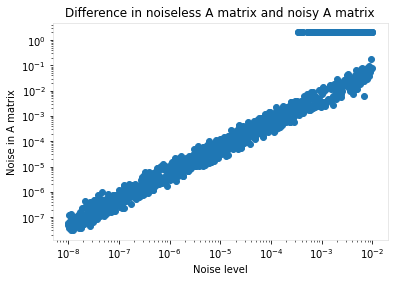

In [472]:
plt.scatter(sigma_vec,err_A)
plt.title("Difference in noiseless A matrix and noisy A matrix")
plt.xlabel("Noise level")
plt.ylabel("Noise in A matrix")
plt.xscale('log')
plt.yscale('log')
plt.show()

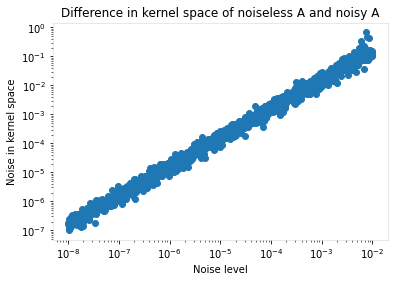

In [473]:
plt.scatter(sigma_vec, err_U_test)
plt.title("Difference in kernel space of noiseless A and noisy A")
plt.xlabel("Noise level")
plt.ylabel("Noise in kernel space")
plt.xscale('log')
plt.yscale('log')
plt.show()

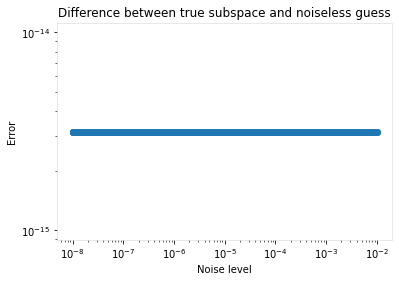

In [474]:
plt.scatter(sigma_vec, err_noiseless_test)
plt.title("Difference between true subspace and noiseless guess")
plt.xlabel("Noise level")
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')
plt.show()

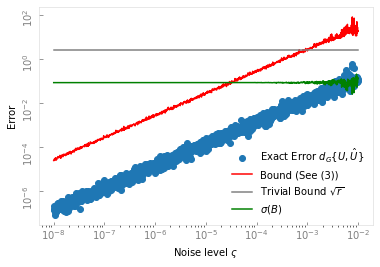

In [475]:
fig = plt.figure()

ax = fig.add_subplot()

ax.tick_params(direction="in")
plt.yticks(rotation=90)
ax.tick_params(axis='x',direction="in", colors='gray')    #setting up X-axis tick color to red
ax.tick_params(axis='y',direction="in", colors='gray')

plt.scatter(sigma_vec, err_noisy_test, label = r'Exact Error $d_G\{U, \hat{U}\}$')
plt.xlabel(r'Noise level $\varsigma$')
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')

plt.plot(sigma_vec,bounds,color = 'red', label = 'Bound (See (3))')
plt.plot(sigma_vec,Sig_B_vec, color = 'green', label = r'$\sigma(B)$')
plt.plot(sigma_vec,np.full((num,),np.sqrt(r),dtype = float), color = 'grey', label = r'Trivial Bound $\sqrt{r}$')

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

    
# specify order
order = [3, 0, 2, 1]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], frameon = False)


plt.rcParams["axes.edgecolor"] = "lightgray"  #Border color
plt.rcParams["axes.linewidth"] = 0.50      #Border Width

plt.savefig('Noise_Sampling2_Low_Dim.eps', format='eps')



plt.show()

## Experiment 2: Increasing ambient dimension m, keeping noise level and subspace dimension constant

In [476]:
lower_dim = 20
upper_dim = 200
num_tests = 100 #Number of tests per dimension
increment = 10 #Increment of dimension (Make sure it divides upper_dim - nower_dim)
num = np.int((upper_dim-lower_dim)/increment)*num_tests

r = 7 #Dimension of U
sigma = 1e-7 #Noise level / standard deviation of noise

m_vec = np.empty(num, dtype = 'int')
c=0
for i in range(lower_dim,upper_dim,increment):
    for j in range(0,num_tests):
        m_vec[c] = i
        c+=1

In [477]:
err_A = np.empty(num, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_U_test = np.empty(num, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_noiseless_test = np.empty(num, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noisy_test = np.empty(num, dtype = float) # Stores error in difference between true projection and noise guess
bounds = np.empty(num, dtype = float) #Stores the error bounds for each experiment (Old)
delta_vec = np.empty(num, dtype = float) #Stores the values of delta (i.e. min singular value of projection)
Sig_B_vec = np.empty(num, dtype = float) #Stores the singular values of B for each experiment

c = 0

for m_ in m_vec:
    
    U = np.random.normal(0, 1, (m_,r))
    
    W = np.zeros((m_,m_-r))

    #Uncomment for the first type of W matrix
    """
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            if i < r:
                W[i][j] = 1
            else:
                if i-r == j:
                    W[i][j] = 1
    """
    #Uncomment for the second type of W matrix
    
    for i in range(W.shape[1]):
        temp = 0
        while temp!=r+1:
            W[temp+i][i] = 1
            temp+=1
    
    

    
    err_A[c], err_U_test[c], err_noiseless_test[c], err_noisy_test[c], bounds[c], delta_vec[c], Sig_B_vec[c] = Errors(m_,r,U,W,sigma)
    
    c+=1

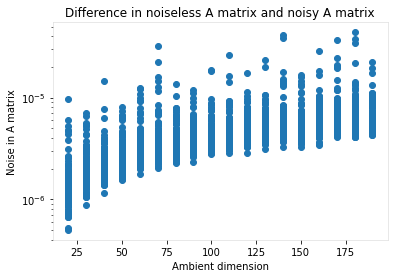

In [478]:
plt.scatter(m_vec,err_A)
plt.title("Difference in noiseless A matrix and noisy A matrix")
plt.xlabel("Ambient dimension")
plt.ylabel("Noise in A matrix")
plt.yscale('log')
plt.show()

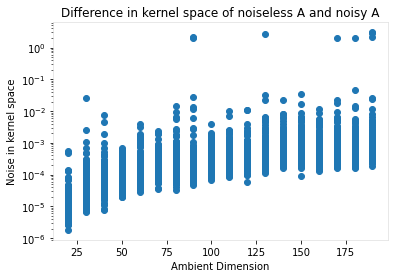

In [479]:
plt.scatter(m_vec, err_U_test)
plt.title("Difference in kernel space of noiseless A and noisy A")
plt.xlabel("Ambient Dimension")
plt.ylabel("Noise in kernel space")
plt.yscale('log')
plt.show()

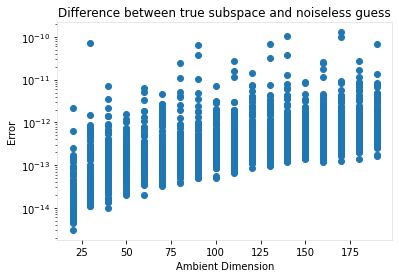

In [480]:
plt.scatter(m_vec, err_noiseless_test)
plt.title("Difference between true subspace and noiseless guess")
plt.xlabel("Ambient Dimension")
plt.ylabel("Error")
plt.yscale('log')
plt.show()

In [481]:
# Averaging results of each trial

avg_bounds = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores average of results of each test
avg_error = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores average of results of each test
avg_sigma = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores average of results of each test
m_vec_distinct = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores the distinct values of m

c=0

for i in range(np.int((upper_dim-lower_dim)/increment)):
    sum_bounds = 0
    sum_error = 0
    sum_sigma = 0

    for j in range(0,num_tests):
        sum_bounds = sum_bounds + bounds[(i*num_tests)+j]
        sum_error = sum_error + err_noisy_test[(i*num_tests)+j]
        sum_sigma = sum_sigma + Sig_B_vec[(i*num_tests)+j]
        
    avg_bounds[c] = sum_bounds/num_tests
    avg_error[c] = sum_error/num_tests
    avg_sigma[c] = sum_sigma/num_tests
    c+=1
    
c = 0
for i in range(lower_dim, upper_dim, increment):
    m_vec_distinct[c] = i
    c+=1

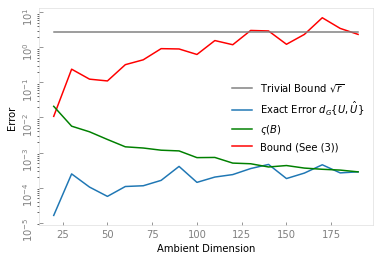

In [482]:
fig = plt.figure()

ax = fig.add_subplot()

ax.tick_params(direction="in")
plt.yticks(rotation=90)
ax.tick_params(axis='x',direction="in", colors='gray')    #setting up X-axis tick color to red
ax.tick_params(axis='y',direction="in", colors='gray')





plt.plot(m_vec_distinct, avg_error, label = r'Exact Error $d_G\{U, \hat{U}\}$')
plt.xlabel(r'Ambient Dimension')
plt.ylabel("Error")
plt.yscale('log')

plt.plot(m_vec_distinct,avg_bounds,color = 'red', label = 'Bound (See (3))')
plt.plot(m_vec_distinct,avg_sigma, color = 'green', label = r'$\varsigma(B)$')
plt.plot(m_vec_distinct,np.full((np.int(num/num_tests),),np.sqrt(r),dtype = float), color = 'grey', label = r'Trivial Bound $\sqrt{r}$')

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

    
# specify order
order = [3, 0, 2, 1]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], frameon = False)


plt.rcParams["axes.edgecolor"] = "lightgray"  #Border color
plt.rcParams["axes.linewidth"] = 0.50      #Border Width
plt.savefig('Ambient_Dim_Sampling_2.eps', format='eps')

plt.show()



## Experiment 3: Increasing subspace dimension r, keeping noise level and ambient dimension constant

In [457]:
lower_dim = 5
upper_dim = 50
num_tests = 100 #Number of tests per dimension
increment = 5 #Increment of dimension (Make sure it divides upper_dim - nower_dim)
num = np.int((upper_dim-lower_dim)/increment)*num_tests

r = 7 #Dimension of U
sigma = 1e-5 #Noise level / standard deviation of noise


r_vec = np.empty(num, dtype = 'int')
c=0
for i in range(lower_dim,upper_dim,increment):
    for j in range(0,num_tests):
        r_vec[c] = i
        c+=1

In [458]:
err_A = np.empty(num, dtype = float) #Stores error in kernel spaces for each experiment (no noise vs noise)
err_U_test = np.empty(num, dtype = float) #Stores error in kernel spaces of A, i.e. errors in 'guesses' (no noise vs noise)
err_noiseless_test = np.empty(num, dtype = float) #Stores error in the difference between true projection and no noise guess
err_noisy_test = np.empty(num, dtype = float) # Stores error in difference between true projection and noise guess
bounds = np.empty(num, dtype = float) #Stores the error bounds for each experiment (Old)
delta_vec = np.empty(num, dtype = float) #Stores the values of delta (i.e. min singular value of projection)
Sig_B_vec = np.empty(num, dtype = float) #Stores the singular values of B for each experiment

c = 0

for r_ in r_vec:
    U = np.random.normal(0, 1, (m,r_))
    
    W = np.zeros((m,m-r_))

    #Uncomment for the first type of W matrix
    """
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            if i < r_:
                W[i][j] = 1
            else:
                if i-r_ == j:
                    W[i][j] = 1
    """
    #Uncomment for the second type of W matrix
    
    for i in range(W.shape[1]):
        temp = 0
        while temp!=r_+1:
            W[temp+i][i] = 1
            temp+=1
    
   
    err_A[c], err_U_test[c], err_noiseless_test[c], err_noisy_test[c], bounds[c], delta_vec[c], Sig_B_vec[c] = Errors(m,r_,U,W,sigma)
    c+=1

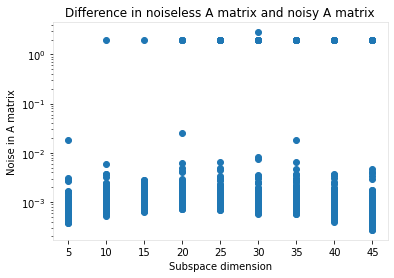

In [459]:
plt.scatter(r_vec,err_A)
plt.title("Difference in noiseless A matrix and noisy A matrix")
plt.xlabel("Subspace dimension")
plt.ylabel("Noise in A matrix")
plt.yscale('log')
plt.show()

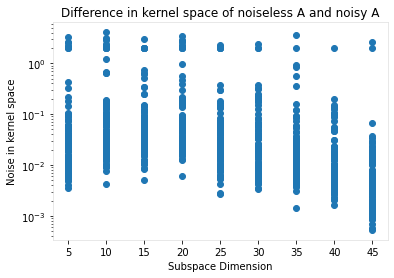

In [460]:
plt.scatter(r_vec, err_U_test)
plt.title("Difference in kernel space of noiseless A and noisy A")
plt.xlabel("Subspace Dimension")
plt.ylabel("Noise in kernel space")
plt.yscale('log')
plt.show()

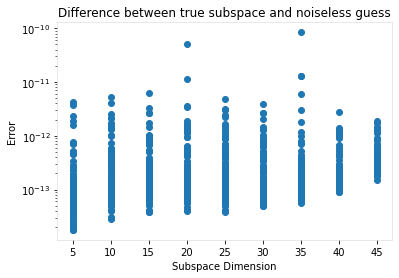

In [461]:
plt.scatter(r_vec, err_noiseless_test)
plt.title("Difference between true subspace and noiseless guess")
plt.xlabel("Subspace Dimension")
plt.ylabel("Error")
plt.yscale('log')
plt.show()

In [462]:
# Averaging results of each trial

avg_bounds = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores average of results of each test
avg_error = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores average of results of each test
avg_sigma = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores average of results of each test
r_vec_distinct = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float') #Stores the distinct values of r

c=0

for i in range(np.int((upper_dim-lower_dim)/increment)):
    sum_bounds = 0
    sum_error = 0
    sum_sigma = 0

    for j in range(0,num_tests):
        sum_bounds = sum_bounds + bounds[(i*num_tests)+j]
        sum_error = sum_error + err_noisy_test[(i*num_tests)+j]
        sum_sigma = sum_sigma + Sig_B_vec[(i*num_tests)+j]
        
    avg_bounds[c] = sum_bounds/num_tests
    avg_error[c] = sum_error/num_tests
    avg_sigma[c] = sum_sigma/num_tests
    c+=1
    
c = 0
for i in range(lower_dim, upper_dim, increment):
    r_vec_distinct[c] = i
    c+=1

In [463]:
root_r_vec = np.empty(np.int((upper_dim-lower_dim)/increment), dtype = 'float')

for i in range(np.int((upper_dim-lower_dim)/increment)):
    root_r_vec[i] = math.sqrt(r_vec_distinct[i])

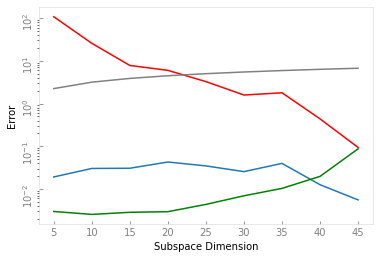

In [467]:
fig = plt.figure()

ax = fig.add_subplot()

ax.tick_params(direction="in")
plt.yticks(rotation=90)
ax.tick_params(axis='x',direction="in", colors='gray')    #setting up X-axis tick color to red
ax.tick_params(axis='y',direction="in", colors='gray')

plt.plot(r_vec_distinct, avg_error, label = r'Exact Error $d_G\{U, \hat{U}\}$')

plt.xlabel(r'Subspace Dimension')
plt.ylabel("Error")

plt.yscale('log')

plt.plot(r_vec_distinct,avg_bounds,color = 'red', label = 'Bound (See (3))')
plt.plot(r_vec_distinct,avg_sigma, color = 'green', label = r'$\varsigma(B)$')
plt.plot(r_vec_distinct,root_r_vec, color = 'grey', label = r'Trivial Bound $\sqrt{r}$')

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

    
# specify order
order = [3, 0, 2, 1]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], frameon = False)


plt.rcParams["axes.edgecolor"] = "lightgray"  #Border color
plt.rcParams["axes.linewidth"] = 0.50      #Border Width
plt.savefig('Subspace_Dim_Sampling_2.eps', format='eps')

plt.show()



## Statistical analysis

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

lam_vec_reshape = lam_vec.reshape(-1,1)

reg = LinearRegression().fit(lam_vec_reshape,err_noise_test)

lam_vec_test = np.random.uniform(low_b,upper_b,num) # Vector that stores different noise values to test
lam_vec_test = np.sort(lam_vec_test)
lam_vec_test = lam_vec_test.reshape(-1,1)

pred_err = reg.predict(lam_vec_test)

In [ ]:
x = np.linspace(low_b,upper_b,num)
y = (2*np.sqrt(r))*x

plt.scatter(lam_vec, err_noise_test)
plt.plot(lam_vec, pred_err, '-', color = 'red')
plt.title("Difference in true subspace and noisy guess")
plt.xlabel("Noise level")
plt.ylabel("Error")
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,color = 'green')
plt.show()

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(np.vstack((lam_vec, err_nullSpace)).T)

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(lam_vec, err_nullSpace)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
#plt.xscale('log')
#plt.yscale('log')
plt.plot(x,y, color = 'red')
plt.axis('equal');